In [1]:
save_dir_path= 'ADC_data/HOF'
data_path = 'ADC_data/HOF_Qsar_selected.csv'

target_column_name = 'labels'
primary_column_name = 'low_accuracy_result'
drop_col_list = None

title_theme = ''
x_axis_name = target_column_name
y_axis_name = primary_column_name


using_primary_as_training = False

self_define_train_test = False

feature_selection_mood = False

In [2]:
# Parameters
data_path = "ADC_data/HOF/HOF_Qsar_selected.csv"
target_column_name = "labels"
primary_column_name = "low_accuracy_result"
using_primary_as_training = True
title_theme = "HOF"
x_axis_name = "Exp."
y_axis_name = "DFT"


In [3]:
if drop_col_list is None:
    drop_col_list  =[]
else:
    drop_col_list = drop_col_list.split(',')

if not using_primary_as_training:
    drop_col_list.append(primary_column_name)

In [4]:
from pprint import pprint

import sklearn.datasets
import sklearn.metrics
import pickle

import autosklearn.regression
import matplotlib.pyplot as plt
import numpy as np
import os
import utils
import importlib
importlib.reload(utils)
from utils import evaluation, plot_scatter
%matplotlib inline

In [5]:
if not feature_selection_mood:
    if not os.path.exists(save_dir_path):
        os.makedirs(save_dir_path)

In [6]:
import pandas as pd
df_data = pd.read_csv(data_path,index_col=0)
df_data.dropna(inplace=True,axis='columns')

df_data

,ECFP4_1873,ECFP4_114,ECFP4_1928,ECFP4_294,ECFP4_926,ECFP4_699,ECFP4_1088,ECFP4_794,ECFP4_1602,ECFP4_695,...,ECFP4_1708,ECFP4_230,ECFP4_1607,ECFP4_1019,ECFP4_1325,ECFP4_1066,ECFP4_392,ECFP4_1750,low_accuracy_result,labels
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,-21.783837,-17.900000
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,-11.663744,-10.970000
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,-52.258273,-57.800000
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,56.874942,54.190000
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,31.300184,31.500000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
203,0,0,0,1,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,-76.228622,-71.606119
204,0,0,0,1,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,-88.688568,-87.300000
205,0,0,0,1,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,-63.467016,-54.607234
206,0,0,0,1,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,-90.445160,-85.098789


In [7]:
y_all = df_data[target_column_name]
X_all = df_data.drop(columns=[target_column_name])
X_all.drop(columns=drop_col_list,inplace=True)

if self_define_train_test:
    train_idx = df_data[df_data['Class']=='2'].index
    if not using_primary_as_training:
        X_all = X_all.drop(columns=[primary_column_name])
    
    from sklearn.model_selection import train_test_split
    X_train, X_test, y_train, y_test = train_test_split(X_all, y_all, test_size=0.2, random_state=43)


    # from sklearn.decomposition import PCA
    # pca = PCA(n_components=3)

    # # 拟合并转换数据
    # X_pca = pca.fit_transform(X)
    

else:
    from sklearn.model_selection import train_test_split
    X_train, X_test, y_train, y_test = train_test_split(X_all, y_all, test_size=0.2, random_state=43)


X_test

,ECFP4_1873,ECFP4_114,ECFP4_1928,ECFP4_294,ECFP4_926,ECFP4_699,ECFP4_1088,ECFP4_794,ECFP4_1602,ECFP4_695,...,ECFP4_383,ECFP4_1708,ECFP4_230,ECFP4_1607,ECFP4_1019,ECFP4_1325,ECFP4_1066,ECFP4_392,ECFP4_1750,low_accuracy_result
10,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,-43.886665
183,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,-8.312418
45,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,59.233654
29,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,2.362878
191,1,0,0,1,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,1,-38.173173
173,1,0,1,0,0,1,1,0,0,0,...,0,0,1,0,0,0,0,0,1,-86.142564
148,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,-57.819582
174,1,0,1,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,1,-43.266493
140,1,0,0,1,0,0,1,0,0,0,...,0,0,0,0,0,0,1,0,1,2.942598
77,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,-74.527536


plot_scatter


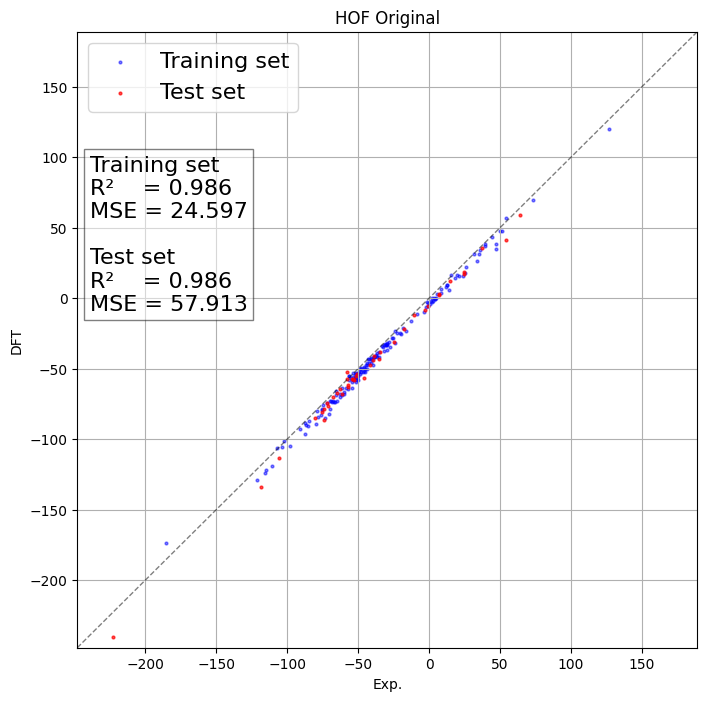

In [8]:
importlib.reload(utils)
from utils import plot_scatter
if using_primary_as_training:
    name = [title_theme + ' Original',x_axis_name,y_axis_name]
    before_fig = plot_scatter(y_train,X_train[primary_column_name],y_test,X_test[primary_column_name],name=name,label=['Training set','Test set'])
    #plot_scatter(y_all,X_all[primary_column_name],name=name,label=['Class 2'])
    if not feature_selection_mood:
        before_fig.savefig(save_dir_path+'/0_before_delta.jpg')

随机森林测试

Mean Squared Error: 1733.3030078902016
R-squared: 0.5904984656298993
plot_scatter


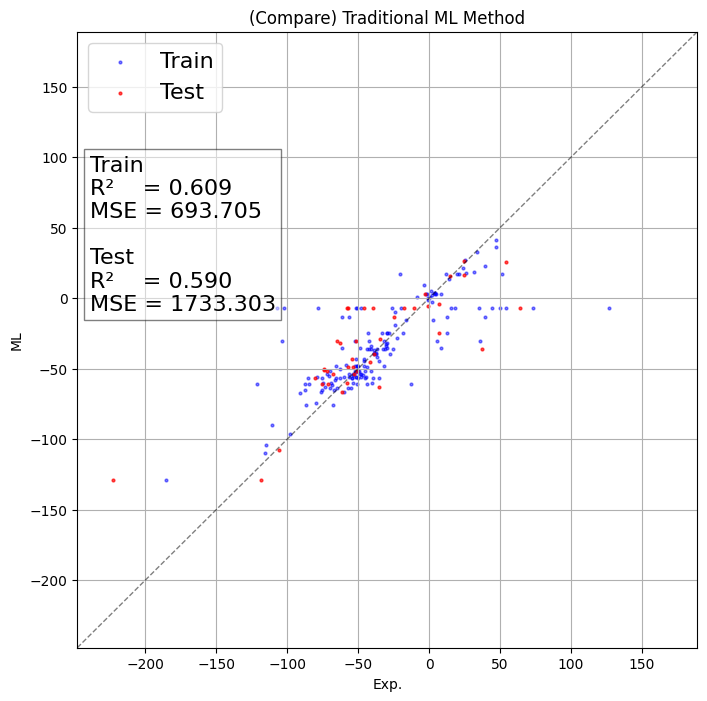

Feature ranking:
1. feature ECFP4_1873 (0.25064692364873287)
2. feature ECFP4_695 (0.10873107604909185)
3. feature ECFP4_294 (0.07088320936367022)
4. feature ECFP4_1602 (0.06864182052901238)
5. feature ECFP4_114 (0.05424480010699165)
6. feature ECFP4_392 (0.047932432231161975)
7. feature ECFP4_1 (0.04135541622312197)
8. feature ECFP4_926 (0.031181443062067854)
9. feature ECFP4_389 (0.03115838324264933)
10. feature ECFP4_1928 (0.025540282204212464)
11. feature ECFP4_1550 (0.024580424744510533)
12. feature ECFP4_699 (0.02440588501507373)
13. feature ECFP4_794 (0.02215818631482934)
14. feature ECFP4_1035 (0.02107488061861497)
15. feature ECFP4_489 (0.02094183130429999)
16. feature ECFP4_1847 (0.015090358741214198)
17. feature ECFP4_591 (0.01403528640231199)
18. feature ECFP4_147 (0.013799475083235308)
19. feature ECFP4_378 (0.01368332268118614)
20. feature ECFP4_950 (0.010320905036150392)
21. feature ECFP4_656 (0.009345449415191024)
22. feature ECFP4_1088 (0.007976592937415013)
23. featur

In [9]:
if not feature_selection_mood:
    from sklearn.ensemble import RandomForestRegressor
    from sklearn.metrics import mean_squared_error, r2_score

    # 假设 X_train, X_test, y_train, y_test 是预处理好的数据集

    # 创建随机森林回归器实例
    rf = RandomForestRegressor(n_estimators=100, random_state=42)

    rf_X_train = X_train.drop(columns=[primary_column_name])
    rf_X_test = X_test.drop(columns=[primary_column_name])
    rf.fit(rf_X_train, y_train)

    # 预测测试集
    rf_train_pred = rf.predict(rf_X_train)
    rf_test_pred= rf.predict(rf_X_test)

    # 评估模型
    mse = mean_squared_error(y_test, rf_test_pred)
    r2 = r2_score(y_test, rf_test_pred)

    print(f"Mean Squared Error: {mse}")
    print(f"R-squared: {r2}")

    name = ['(Compare) Traditional ML Method',x_axis_name,'ML']
    label = ['Train','Test']
    rfr_fig = plot_scatter(y_train,rf_train_pred,y_test,rf_test_pred,name=name,label=label)

    rfr_fig.savefig(save_dir_path+'/1_compare.jpg')

    # 获取特征重要性

    importances = rf.feature_importances_

    # 将特征重要性排序
    indices = np.argsort(importances)[::-1]

    # 打印特征重要性
    print("Feature ranking:")
    for f in range(rf_X_train.shape[1]):
        print(f"{f + 1}. feature {rf_X_train.columns[indices[f]]} ({importances[indices[f]]})")

# Auto SKL

In [10]:
automl = autosklearn.regression.AutoSklearnRegressor(
    memory_limit=16384,
    time_left_for_this_task=200,
    per_run_time_limit=30,

)
automl.fit(X_train, y_train)

print(automl.leaderboard())
pprint(automl.show_models(), indent=4)

          rank  ensemble_weight            type      cost  duration
model_id                                                           
64           1             0.52  ard_regression  0.002506  0.528418
98           2             0.04   liblinear_svr  0.002588  0.606999
97           3             0.26   liblinear_svr  0.002752  0.482032
78           4             0.04   liblinear_svr  0.003187  0.487747
77           5             0.10   liblinear_svr  0.003892  0.491325
32           6             0.02   liblinear_svr  0.052575  0.447554
45           7             0.02   liblinear_svr  0.098458  1.227445
{   32: {   'cost': 0.05257491849618667,
            'data_preprocessor': <autosklearn.pipeline.components.data_preprocessing.DataPreprocessorChoice object at 0x718204f94490>,
            'ensemble_weight': 0.02,
            'feature_preprocessor': <autosklearn.pipeline.components.feature_preprocessing.FeaturePreprocessorChoice object at 0x7180bd0435b0>,
            'model_id': 32,
   

In [11]:
y_pred_train = automl.predict(X_train)
y_pred = automl.predict(X_test)
y_pred_all = np.concatenate((y_pred_train,y_pred))
# df_data['Delta_Result'] = y_pred_all
# df_data[[target_column_name,'Delta_Result']]

plot_scatter


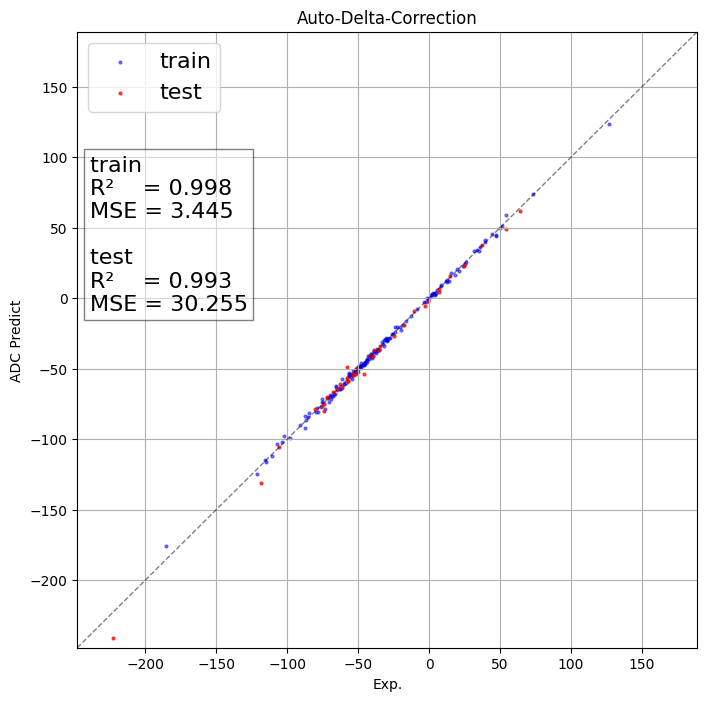

In [12]:
name = ['Auto-Delta-Correction',x_axis_name,'ADC Predict']
label = ['train','test']
fig_adc = plot_scatter(y_train,y_pred_train,y_test,y_pred,name = name,label=label)

if not feature_selection_mood:
    fig_adc.savefig(save_dir_path+'/2_adc')
    with open(save_dir_path+'/ADC_automl_model.pkl','wb') as f:
        pickle.dump(automl,f)

## Feature Importance

In [13]:
from sklearn.inspection import permutation_importance

result = permutation_importance(automl, X_test, y_test, n_repeats=3, random_state=0,n_jobs=32)


In [14]:
for i in result.importances_mean.argsort()[::-1]:
    print(f"Feature {X_all.columns[i]} has importance {result.importances_mean[i]:.3f} +/- {result.importances_std[i]:.3f}")

Feature low_accuracy_result has importance 1.922 +/- 0.152
Feature ECFP4_1928 has importance 0.002 +/- 0.000
Feature ECFP4_378 has importance 0.001 +/- 0.000
Feature ECFP4_1873 has importance 0.000 +/- 0.000
Feature ECFP4_1301 has importance 0.000 +/- 0.000
Feature ECFP4_1328 has importance 0.000 +/- 0.000
Feature ECFP4_1088 has importance 0.000 +/- 0.000
Feature ECFP4_950 has importance 0.000 +/- 0.000
Feature ECFP4_699 has importance 0.000 +/- 0.000
Feature ECFP4_1603 has importance 0.000 +/- 0.000
Feature ECFP4_1 has importance 0.000 +/- 0.000
Feature ECFP4_695 has importance 0.000 +/- 0.000
Feature ECFP4_1866 has importance 0.000 +/- 0.000
Feature ECFP4_1754 has importance 0.000 +/- 0.000
Feature ECFP4_926 has importance 0.000 +/- 0.000
Feature ECFP4_489 has importance 0.000 +/- 0.000
Feature ECFP4_1750 has importance 0.000 +/- 0.000
Feature ECFP4_1799 has importance 0.000 +/- 0.000
Feature ECFP4_392 has importance 0.000 +/- 0.000
Feature ECFP4_1824 has importance 0.000 +/- 0.000
F

In [15]:
feature_names = X_all.columns
importances = result.importances_mean

# 将特征按重要性排序
sorted_indices = importances.argsort()[::-1]
sorted_features = feature_names[sorted_indices]
sorted_importances = importances[sorted_indices]

# 将特征分为普通特征和 sol_ 特征
normal_features = []

for feature, importance in zip(sorted_features, sorted_importances):
    normal_features.append((feature, importance))

# 取前20个普通特征和前20个 sol_ 特征
top_normal = normal_features[:50]

In [16]:
top_normal_names = [feature for feature, _ in top_normal]
selected_features_list = top_normal_names
selected_features_list.append(primary_column_name)
selected_features_list.append(target_column_name)
selected_features_list

['low_accuracy_result',
 'ECFP4_1928',
 'ECFP4_378',
 'ECFP4_1873',
 'ECFP4_1301',
 'ECFP4_1328',
 'ECFP4_1088',
 'ECFP4_950',
 'ECFP4_699',
 'ECFP4_1603',
 'ECFP4_1',
 'ECFP4_695',
 'ECFP4_1866',
 'ECFP4_1754',
 'ECFP4_926',
 'ECFP4_489',
 'ECFP4_1750',
 'ECFP4_1799',
 'ECFP4_392',
 'ECFP4_1824',
 'ECFP4_745',
 'ECFP4_389',
 'ECFP4_1236',
 'ECFP4_1670',
 'ECFP4_875',
 'ECFP4_1066',
 'ECFP4_230',
 'ECFP4_147',
 'ECFP4_1035',
 'ECFP4_1125',
 'ECFP4_249',
 'ECFP4_723',
 'ECFP4_225',
 'ECFP4_1708',
 'ECFP4_1325',
 'ECFP4_1019',
 'ECFP4_1602',
 'ECFP4_383',
 'ECFP4_656',
 'ECFP4_1249',
 'ECFP4_1738',
 'ECFP4_1357',
 'ECFP4_1550',
 'ECFP4_310',
 'ECFP4_591',
 'ECFP4_1847',
 'ECFP4_1349',
 'ECFP4_1607',
 'ECFP4_794',
 'ECFP4_294',
 'low_accuracy_result',
 'labels']

In [17]:
df_data_selected = df_data[selected_features_list]
if feature_selection_mood:
    df_data_selected.to_csv(data_path[:-4]+'_selected.csv')